In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
kilos = np.random.randint(1,100,1000)
kilos

array([27, 75, 60, 87, 45, 67, 57, 64, 85, 19, 16, 50, 35, 54, 16, 52, 73,
       43, 58, 93,  9, 83, 65, 47, 96, 19, 14, 23, 25, 62, 31, 35, 44,  4,
       75, 67, 66, 74,  8, 61, 32, 85, 57, 65, 73, 42, 71, 30,  2, 49,  7,
       85, 68, 24, 65, 59, 41, 18, 44,  3, 21, 58,  6, 27, 79, 46,  8, 10,
       44, 48,  1,  9, 42, 39, 98, 68, 88, 76, 97, 52,  6,  4, 79, 13, 91,
       88, 79, 53, 42, 83, 46, 23, 76, 75, 50, 56, 30, 25, 12, 50, 30, 35,
       70, 33, 40,  3, 59, 19, 80, 26, 63, 58, 16, 87, 76, 72, 27, 20, 59,
       53, 86, 42,  2, 17, 86, 43, 91, 32, 17, 52, 25,  5, 67, 70, 36, 10,
       27, 42, 57, 50,  1, 62, 16, 77, 94, 55, 27, 48, 48, 18, 19, 11, 60,
       51, 31, 19, 61, 24, 88, 36, 27, 34,  3, 72, 88, 48, 60, 62, 39, 42,
       57, 88, 22, 57, 12, 87, 16, 15, 52, 76, 58, 97, 28, 93, 58, 79, 88,
       21, 37, 35, 14, 78, 30, 75, 61, 55, 10, 55, 24, 28, 29,  2,  5, 38,
        9, 78,  3, 47, 66, 90, 80, 37, 87, 87, 20,  2,  6, 74, 63, 98, 55,
       51, 57, 20, 59, 26

In [3]:
libras = kilos * 2.20462
libras

array([ 59.52474, 165.3465 , 132.2772 , 191.80194,  99.2079 , 147.70954,
       125.66334, 141.09568, 187.3927 ,  41.88778,  35.27392, 110.231  ,
        77.1617 , 119.04948,  35.27392, 114.64024, 160.93726,  94.79866,
       127.86796, 205.02966,  19.84158, 182.98346, 143.3003 , 103.61714,
       211.64352,  41.88778,  30.86468,  50.70626,  55.1155 , 136.68644,
        68.34322,  77.1617 ,  97.00328,   8.81848, 165.3465 , 147.70954,
       145.50492, 163.14188,  17.63696, 134.48182,  70.54784, 187.3927 ,
       125.66334, 143.3003 , 160.93726,  92.59404, 156.52802,  66.1386 ,
         4.40924, 108.02638,  15.43234, 187.3927 , 149.91416,  52.91088,
       143.3003 , 130.07258,  90.38942,  39.68316,  97.00328,   6.61386,
        46.29702, 127.86796,  13.22772,  59.52474, 174.16498, 101.41252,
        17.63696,  22.0462 ,  97.00328, 105.82176,   2.20462,  19.84158,
        92.59404,  85.98018, 216.05276, 149.91416, 194.00656, 167.55112,
       213.84814, 114.64024,  13.22772,   8.81848, 

In [4]:
datos = {
    "kilos": kilos,
    "libras": libras
}
df = pd.DataFrame(datos)
df

,kilos,libras
0,27,59.52474
1,75,165.34650
2,60,132.27720
3,87,191.80194
4,45,99.20790
...,...,...
995,55,121.25410
996,88,194.00656
997,50,110.23100
998,43,94.79866


In [5]:
x = df['kilos'].values
y = df['libras'].values

In [6]:
# Separar datos de entrenamiento
x_train, x_valid, y_train, y_valid  = train_test_split(x, y, test_size=0.2)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((800,), (200,), (800,), (200,))

## ¿Se puede aplicar el Perceptron simple? 
### R: Si

In [8]:
# Crear las capas
oculta1 = tf.keras.layers.Dense( units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense( units=3 )
salida = tf.keras.layers.Dense(units=1)

# Crear modelo de keras
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

C:\Users\elsup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
epochs = 5
learning_rate = 0.05

# Definir el tamaño del lote (batch size)
batch_size = 32

In [10]:
# Compilar el modelo
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate),
    loss = 'mean_squared_error'
)

In [11]:

historial = modelo.fit(x_train, y_train, epochs = epochs, verbose=False)

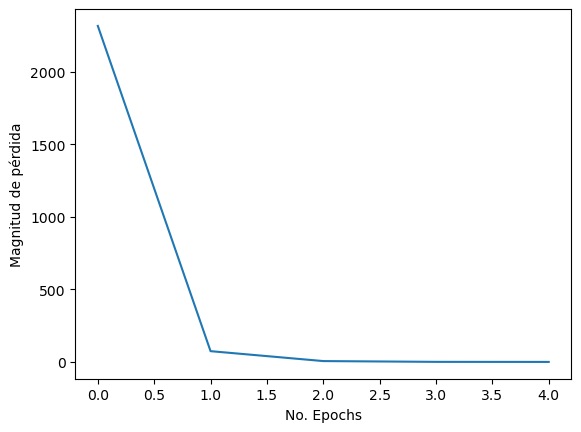

In [12]:
# Mostrar el resultado de la función de pérdida
import matplotlib.pyplot as plt
plt.xlabel("No. Epochs")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])

In [30]:
kilos = np.array([100])
resultado = modelo.predict(kilos)
print(f"{kilos[0]} es equivalente a {resultado[0][0]} Libras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
100 es equivalente a 220.3787384033203 Libras


In [36]:
modelo.save("modelo.keras")